In [7]:
import math
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score # и другие метрики
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # а также другие алгоритмы


In [ ]:
DATA_PATH = "data"
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [-4, 0], [3.5, 3.5], [3.5, -2.0]])

In [ ]:
X.shape, true_labels.shape

((400, 2), (400,))

In [ ]:
def visualize_clusters(X, labels):
    """
    Функция для визуализации кластеров
        :param X: таблица объекты х признаки
        :param labels: np.array[n_samples] - номера кластеров
    """
    
    unique_labels = np.sort(np.unique(labels))
    sns.scatterplot(X[:, 0], X[:, 1], hue=labels, 
                    palette="colorblind", legend=False,
                    hue_order=unique_labels)
    plt.xlabel("$X_1$", fontsize=18)
    plt.ylabel("$X_2$", fontsize=18)
    
    for label in labels:
        center = X[(labels == label)].mean(axis=0)
        plt.scatter(center[0], center[1], s=80, c="#201F12", marker=(5, 2))

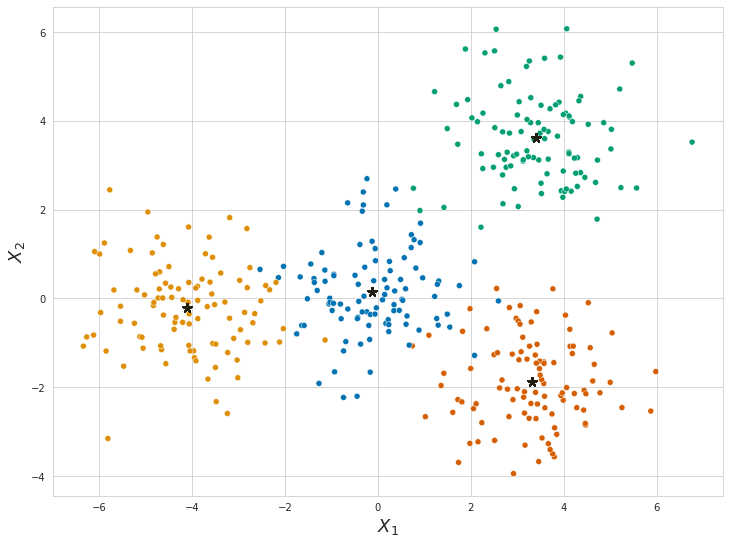

In [ ]:
visualize_clusters(X, true_labels)

In [ ]:
class MyKMeans:
    def __init__(self, n_clusters, init="random", max_iter=300, visualize=False):
        """
        Конструктор класса MyKMeans
            :param n_clusters: число кластеров
            :param init: способ инициализации центров кластеров
                'random' - генерирует координаты случайно из нормального распределения
                'sample' - выбирает центроиды случайно из объектов выборки
            :param max_iter: заданное число итераций 
                (мы не будем реализовывать другой критерий остановки)
            :param visualize: рисовать ли кластеры и их центроиды в процессе работы
                код будет работать сильно дольше, но красиво...
        """
        
        assert init in ["random", "sample"], f"Неизвестный метод инициализации {init}"
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.centroids = None
        self.visualize = visualize
       
    
    def fit(self, X):
        """
        Подбирает оптимальные центры кластеров
            :param X: наши данные (n_samples, n_features)
        :return self: все как в sklearn
        """
        
        n_samples, n_features = X.shape
        
        # Инициализация центров кластеров
        if self.init == "random":
            centroids = np.random.randn(self.n_clusters, n_features)
        elif self.init == "sample":
            centroids_idx = np.random.choice(np.arange(n_samples), 
                                             size=self.n_clusters, 
                                             replace=False)
            centroids = X[centroids_idx]
        
        # Итеративно двигаем центры
        for _ in range(self.max_iter):
            # Посчитаем расстояния для всех объектов до каждого центроида
            dists = []
            for centroid in centroids:
                dists.append(self._calculate_distance(X, centroid))
            dists = np.concatenate(dists, axis=1)
            # Для каждого объекта найдем, к какому центроиду он ближе
            cluster_labels = np.argmin(dists, axis=1)
            
            # Пересчитаем центр масс для каждого кластера
            centroids = []
            for label in np.sort(np.unique(cluster_labels)):
                center = X[(cluster_labels == label)].mean(axis=0)
                centroids.append(center)
            
            # Отрисуем точки, покрасим по меткам кластера, а также изобразим центроиды
            if self.visualize:
                visualize_clusters(X, cluster_labels)
                display.clear_output(wait=True)
                display.display(plt.gcf())
                plt.close()
                
        self.centroids = np.array(centroids)
        
        return self
    
    
    def predict(self, X):
        """
        Для каждого X возвращает номер кластера, к которому он относится
            :param X: наши данные (n_samples, n_features)
        :return cluster_labels: метки кластеров
        """
        
        
        dists = []
        for i in range(len(self.centroids)):

        
          dists.append(self._calculate_distance(X, self.centroids[i,:]))
        dists = np.concatenate(dists, axis=1)

        cluster_labels = np.argmin(dists, axis=1)
        
        
            
        return cluster_labels
        
        
    def _calculate_distance(self, X, centroid):
        """
        Вычисляет Евклидово расстояние от всех объектов в Х до заданного центра кластера (centroid)
            :param X: наши данные (n_samples, n_features)
            :param centroid: координаты центра кластера
        :return dist: расстояния от всех X до центра кластера
        """
        
        dist = np.linalg.norm(X-centroid, axis = 1)
        
        
        return dist.reshape(-1,1)
    
    
    def __repr__(self):
        return f"Привет, я твой KMeans (/¯◡ ‿ ◡)/¯☆*"

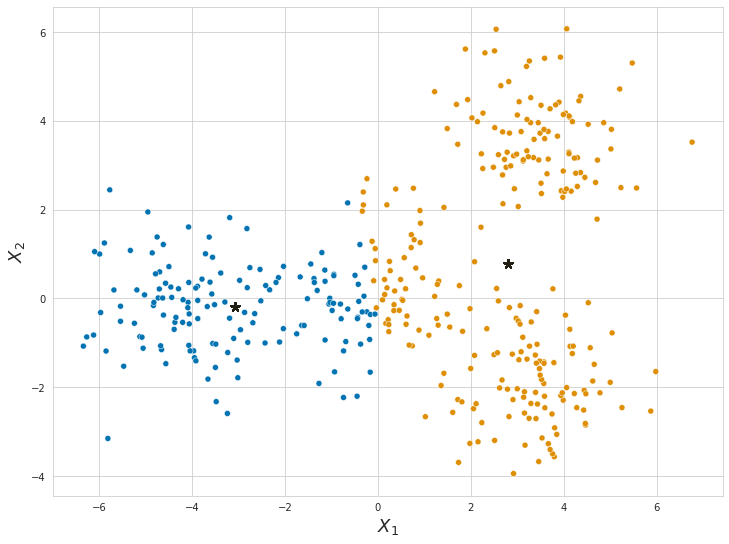

Привет, я твой KMeans (/¯◡ ‿ ◡)/¯☆*

In [ ]:
kmeans = MyKMeans(n_clusters=2, init="random", max_iter=20, visualize=True)
kmeans.fit(X)

In [ ]:
z_stretched_kmeans = kmeans.predict(X)


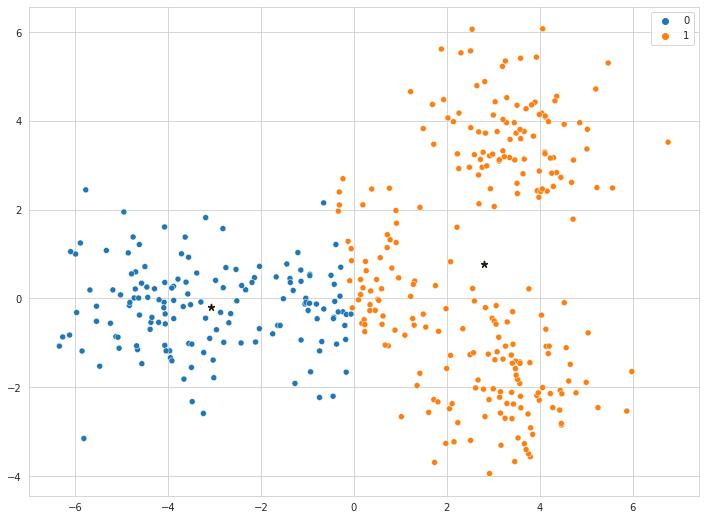

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=z_stretched_kmeans)
plt.scatter(kmeans.centroids[0,0],kmeans.centroids[0,1], c="#201F12", marker=(5, 2))
plt.scatter(kmeans.centroids[1,0],kmeans.centroids[1,1], c="#201F12", marker=(5, 2))

In [ ]:

data = load_digits()
X, y = data.data, data.target

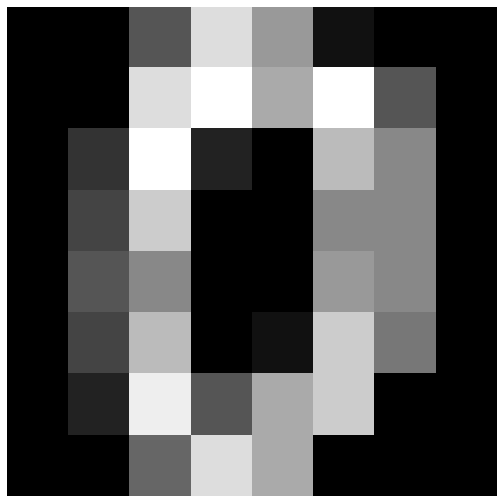

In [ ]:
plt.imshow(X[0].reshape(8, 8).astype(int), cmap="gray")
plt.axis("off");

metrics.v_measure_score(labels_true, ...[, beta]) \\
metrics.silhouette_score(X, labels, *[, ...]) \\
metrics.homogeneity_score(labels_true, ...) \\
metrics.completeness_score(labels_true, ...)

In [ ]:
def algorithm_selection(X, y, distances, algorithms, metrics):
    """
    Для заданных алгоримов кластеризации и гиперпараметров 
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния
        :param algorithm: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации
    :return compare_dataframe: таблица с метриками кластеризации
    """

    """
    YOUR CODE IS HERE
    """
    compare_dataframe = pd.DataFrame(columns = ['distance (метрика расстояния)',
        'linkage (алгоритм иерархической кластеризации)',
        'homogenity',
        'completeness',
        'v_measure',
        'silhouette'])
    i = 0
    for distance in distances:
      for linkage in algorithms:
        model = AgglomerativeClustering(metric=distance, linkage = linkage).fit(X.reshape(len(X),-1))
        lables = model.labels_
        compare_dataframe.loc[i] = [distance, linkage, homogeneity_score(y, lables), completeness_score(y, lables), v_measure_score(y, lables), silhouette_score(X, lables)]
        
        i += 1 

    return compare_dataframe

In [ ]:

distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
algorithms = ['average', 'single', 'complete']
metrics = []

In [ ]:
algorithm_selection(X, y, distances, algorithms, metrics)

,distance (метрика расстояния),linkage (алгоритм иерархической кластеризации),homogenity,completeness,v_measure,silhouette
0,euclidean,average,0.000558,0.271853,0.001114,0.111356
1,euclidean,single,0.000565,0.275198,0.001128,-0.002273
2,euclidean,complete,0.165209,0.549408,0.254031,0.080896
3,l1,average,0.030062,0.376695,0.055681,0.099529
4,l1,single,0.000565,0.275198,0.001128,-0.002273
5,l1,complete,0.052011,0.357351,0.090805,0.080605
6,l2,average,0.000558,0.271853,0.001114,0.111356
7,l2,single,0.000565,0.275198,0.001128,-0.002273
8,l2,complete,0.165209,0.549408,0.254031,0.080896
9,manhattan,average,0.030062,0.376695,0.055681,0.099529


In [2]:
fc_data = pd.read_csv('https://raw.githubusercontent.com/danon6868/BI-ml-2023/main/lecture_3_unsupervised_learning/homework/data/flow_c_data.csv', index_col=0)

In [ ]:
fc_data

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c
0,0.722199,0.154232,0.494449,0.512853,4.057328,1.019255,4.007273,-1.406912,0.384406
1,0.751073,0.114618,4.671924,0.822042,4.933149,0.159388,-0.216407,6.034845,0.577039
2,1.108188,0.150011,-0.422857,4.006353,5.616384,0.519223,0.783077,-0.318668,-0.493832
3,0.553310,0.119929,0.345968,3.332310,5.260935,1.481229,0.264846,0.694883,3.416960
4,0.774884,0.076984,4.984963,0.885501,4.562367,0.217117,0.086279,5.563345,0.471591
...,...,...,...,...,...,...,...,...,...
9995,1.180762,0.441445,2.437344,1.526085,4.455114,4.880495,0.347480,-0.591343,2.857737
9996,0.768279,0.111863,0.812236,4.254496,5.008437,1.303261,-0.130244,0.344169,-0.626795
9997,1.314964,0.233584,4.144130,1.311947,5.340263,1.598675,-0.287353,-0.887078,4.369294
9998,0.894135,0.137300,-0.226186,0.246804,4.430212,0.457881,2.404284,-0.112999,0.069239


In [3]:
def plot_tsne(data, n_iter=1000, 
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: 
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """
    
    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)
    
    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа, 
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=2, init=pca_embedding[:, :2], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity)
    tsne_embedding = tnse.fit_transform(pca_embedding)
    
    sns.scatterplot(x=tsne_embedding[:, 0],
                    y=tsne_embedding[:, 1],
                    hue=color, palette="colorblind")
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)
    
    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными
    
    return tsne_embedding

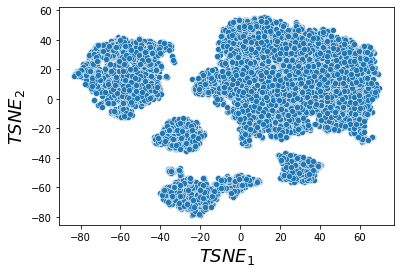

In [4]:
tsne_res = plot_tsne(fc_data)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(fc_data)

In [6]:
siluet_kmeans = silhouette_score(fc_data, kmeans.labels_)
siluet_kmeans

0.6101329228000268

In [8]:
agglom = AgglomerativeClustering(n_clusters=4).fit(fc_data)

In [12]:
siluet_agglom = silhouette_score(fc_data, agglom.labels_)
siluet_agglom

0.6114468221314616

In [13]:
dbscan = DBSCAN(eps=2.5).fit(fc_data)

In [14]:
len(np.unique(dbscan.labels_))

4

In [15]:
siluet_DBSCAN = silhouette_score(fc_data, dbscan.labels_)
siluet_DBSCAN

0.6098693331740913

Agglomerative чуть чуть лучше Kmeans, но примерно одинаково. При подборе eps можно добиться приммерно такого же значения silhouette_score.

array([[-37.23109355, -27.30841703],
       [-52.97572341,  19.98039468],
       [ 52.01552104,  20.07710066],
       ...,
       [  2.85276893, -54.49656493],
       [-29.0233665 , -21.60225473],
       [-35.6494508 , -21.32244245]])

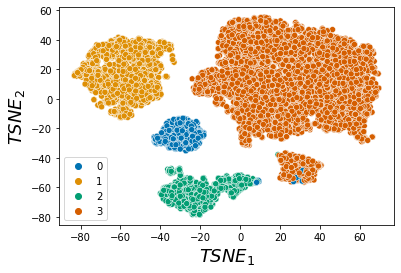

In [16]:
plot_tsne(fc_data, n_iter=1000, 
              perplexity=40, color=kmeans.labels_)

array([[-37.23109355, -27.30841703],
       [-52.97572341,  19.98039468],
       [ 52.01552104,  20.07710066],
       ...,
       [  2.85276893, -54.49656493],
       [-29.0233665 , -21.60225473],
       [-35.6494508 , -21.32244245]])

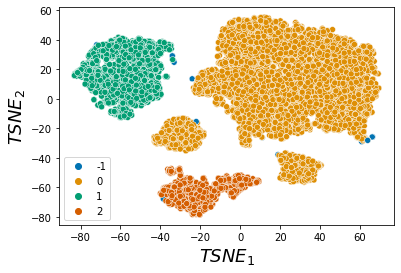

In [17]:
plot_tsne(fc_data, n_iter=1000, 
              perplexity=40, color=dbscan.labels_)

array([[-37.23109355, -27.30841703],
       [-52.97572341,  19.98039468],
       [ 52.01552104,  20.07710066],
       ...,
       [  2.85276893, -54.49656493],
       [-29.0233665 , -21.60225473],
       [-35.6494508 , -21.32244245]])

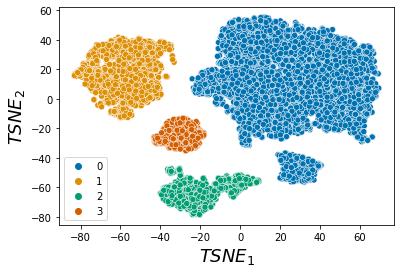

In [18]:
plot_tsne(fc_data, n_iter=1000, 
              perplexity=40, color=agglom.labels_)

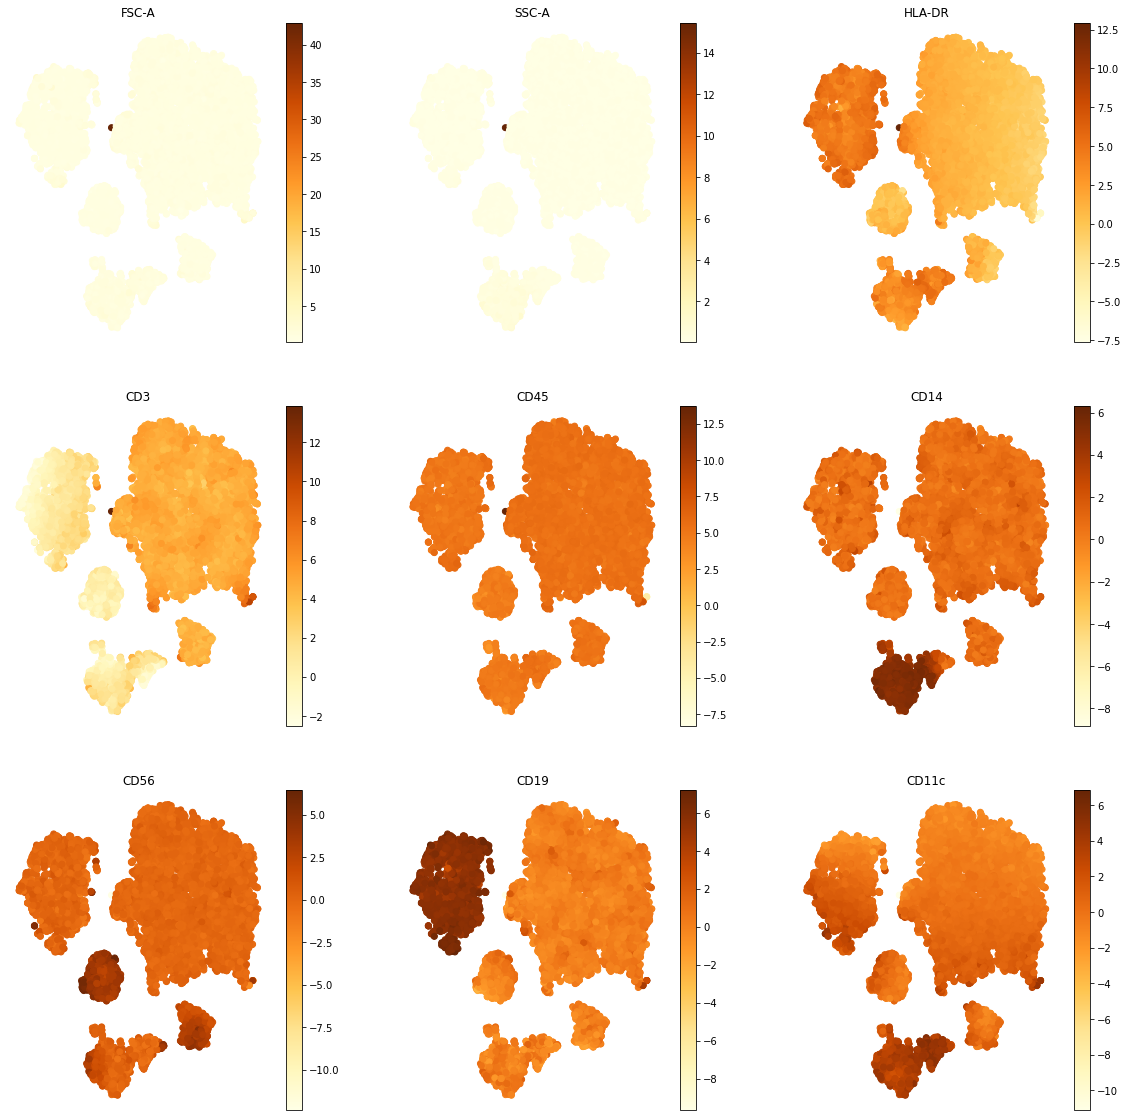

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for col, ax in zip(fc_data.columns, axes.ravel()):
    scatter = ax.scatter(tsne_res[:, 0], tsne_res[:, 1], 
                         c=fc_data[col], cmap="YlOrBr")
    fig.colorbar(scatter, ax=ax)
    ax.set_title(col)
    ax.grid(False)
    ax.axis("off")

In [20]:
cell_type_cluster_map = {0: "Other cells", 
                         1: "B_cells", 
                         2: "Monocytes", 
                         3: "T_cells"}

In [22]:
labeled_fc_data = fc_data.assign(Population=agglom.labels_)
labeled_fc_data["Population"] = labeled_fc_data["Population"].map(cell_type_cluster_map)

In [24]:
labeled_fc_data

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c,Population
0,0.722199,0.154232,0.494449,0.512853,4.057328,1.019255,4.007273,-1.406912,0.384406,T_cells
1,0.751073,0.114618,4.671924,0.822042,4.933149,0.159388,-0.216407,6.034845,0.577039,B_cells
2,1.108188,0.150011,-0.422857,4.006353,5.616384,0.519223,0.783077,-0.318668,-0.493832,Other cells
3,0.553310,0.119929,0.345968,3.332310,5.260935,1.481229,0.264846,0.694883,3.416960,Other cells
4,0.774884,0.076984,4.984963,0.885501,4.562367,0.217117,0.086279,5.563345,0.471591,B_cells
...,...,...,...,...,...,...,...,...,...,...
9995,1.180762,0.441445,2.437344,1.526085,4.455114,4.880495,0.347480,-0.591343,2.857737,Monocytes
9996,0.768279,0.111863,0.812236,4.254496,5.008437,1.303261,-0.130244,0.344169,-0.626795,Other cells
9997,1.314964,0.233584,4.144130,1.311947,5.340263,1.598675,-0.287353,-0.887078,4.369294,Monocytes
9998,0.894135,0.137300,-0.226186,0.246804,4.430212,0.457881,2.404284,-0.112999,0.069239,T_cells


In [28]:
len(labeled_fc_data[labeled_fc_data["Population"]=='Other cells'])


6231

In [29]:
len(labeled_fc_data[labeled_fc_data["Population"]=='B_cells'])

2035

In [31]:
len(labeled_fc_data[labeled_fc_data["Population"]=='Monocytes'])

1099

In [32]:
len(labeled_fc_data[labeled_fc_data["Population"]=='T_cells'])

635

In [40]:
labeled_fc_data.to_csv(r'/content/labeled_fc_data.csv', index= False )